In [9]:
import dataframeinfo as info
import load_and_transform as wd  # "working data"
import numpy as np
import plotter as plots

## Load and check data

In [4]:
loans = wd.loans

In [5]:
loans.head()

,id,member_id,loan_amount,term_months,int_rate,grade,sub_grade,employment_min_years,home_ownership,annual_inc,...,total_rec_int,total_rec_late_fee,recoveries,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,38676116,41461848,68.070671,36.0,7.49,A,A4,5.0,MORTGAGE,10.736397,...,12.052249,0.0,0.0,2022-01-01,5.182531,2022-02-01,2022-01-01,0.0,1,INDIVIDUAL
1,38656203,41440010,82.089586,36.0,6.99,A,A3,9.0,RENT,10.819778,...,13.537679,0.0,0.0,2022-01-01,5.612876,2022-02-01,2022-01-01,0.0,1,INDIVIDUAL
2,38656154,41439961,88.184663,36.0,7.49,A,A4,8.0,MORTGAGE,11.210644,...,13.701596,0.0,0.0,2021-10-01,8.496794,2022-02-01,2021-10-01,0.0,1,INDIVIDUAL
3,38656128,41439934,86.092537,36.0,14.31,C,C4,1.0,RENT,10.645425,...,14.212325,0.0,0.0,2021-06-01,8.559799,2022-02-01,2021-06-01,0.0,1,INDIVIDUAL
4,38656121,41439927,86.092537,36.0,6.03,A,A1,10.0,MORTGAGE,11.884489,...,13.459397,0.0,0.0,2022-01-01,5.711346,2022-02-01,2022-01-01,0.0,1,INDIVIDUAL


In [6]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50418 entries, 0 to 54221
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype        
---  ------                      --------------  -----        
 0   id                          50418 non-null  int64        
 1   member_id                   50418 non-null  int64        
 2   loan_amount                 50418 non-null  float64      
 3   term_months                 50418 non-null  float64      
 4   int_rate                    50418 non-null  float64      
 5   grade                       50418 non-null  category     
 6   sub_grade                   50418 non-null  category     
 7   employment_min_years        50418 non-null  float64      
 8   home_ownership              50418 non-null  category     
 9   annual_inc                  50418 non-null  float64      
 10  verification_status         50418 non-null  object       
 11  issue_date                  50418 non-null  datetime64[s]
 12  loan_stat

## Data analysis

### Task 1 
We will query the data to check the current state of the payments:

Summarise currently what percentage of the loans are recovered against the investor funding and the total amount funded. Visualise your results on an appropriate graph.

Additionally visualise what percentage of the total amount would be recovered up to 6 months' in the future.

<class 'pandas.core.series.Series'>


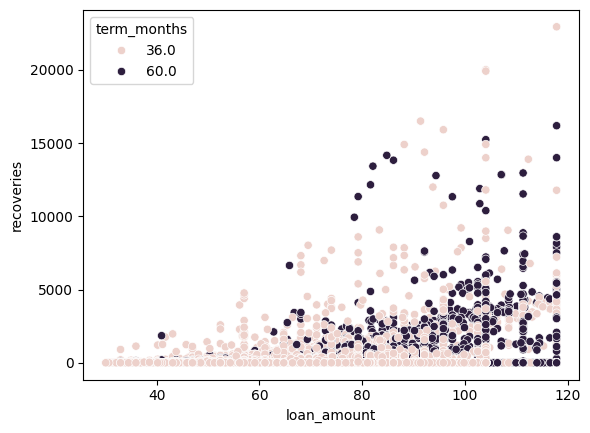

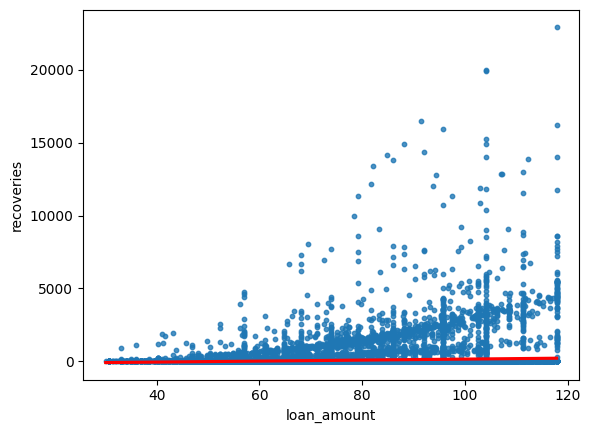

In [24]:
# funded_amount and funded_amount inv were dropped to due to collinearty with loan_amount.

log_recoveries = loans["recoveries"].map(lambda x: np.log(x) if x > 0 else x)
loans["log_recoveries"] = log_recoveries
print(type(log_recoveries))

data_plots = plots.Plotter(loans)
data_plots.scatter("loan_amount", "recoveries", "term_months")
data_plots.scatter_reg("loan_amount", "recoveries")

